In [19]:
import networkx as nx
%matplotlib inline
from random import randrange as rr

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff

init_notebook_mode(connected=True)

In [20]:
df = pd.read_csv("data/wtf.csv")
df['sitc4'] = df['sitc4'].astype(str)
del df['Unnamed: 0']

gdf = df.groupby(["sitc4","exporter"]).sum().reset_index()
gdf = gdf[['sitc4','exporter','value']]

rca_df = pd.read_csv("data/rca.csv")
del rca_df['Unnamed: 0']
rca_df = rca_df.dropna(subset=['sitc4', 'exporter'])

# $M_{cp}$

In [21]:
rca_treshold = 1
mcp = rca_df[rca_df.rca >= rca_treshold]
mcp

,sitc4,exporter,value,rca
1,0015,Areas NES,39012,23.301008
2,001X,Areas NES,30,54.200398
5,0141,Areas NES,158,1.791831
11,02XX,Areas NES,102,111.224206
18,0412,Areas NES,38224,4.208621
...,...,...,...,...
62398,7449,Eur.Other NE,496,9.559791
62399,7919,Eur.Other NE,2110,143.167907
62400,5416,CACM NES,518,553.623273
62401,6841,Br.Antr.Terr,2262,251.251165


# Random functions

In [22]:
products = list(mcp.sitc4.unique())
countries = list(mcp.exporter.unique())
def random_pair():
    r_product=products[rr(0,len(products))]
    r_country=countries[rr(0,len(countries))]


    random_pair = (r_product,r_country)
    return random_pair


In [23]:
def degree_country(country):
    return len(mcp[mcp.exporter == country])

# Null Model 1

Preserves links but random degree sequence for Products and Countries assigned randomly

In [24]:
number_edges = mcp.shape[0]
number_edges

24303

In [25]:
d={}
for i in range(number_edges):
    rp=random_pair()
    d[rp[0]]=rp[1]
    
d

 MC SAR',
 '0585': 'Latvia',
 '812X': 'Somalia',
 '582': 'Cent.Afr.Rep',
 '6543': 'Belize',
 '8973': 'Algeria',
 '7239': 'Bosnia Herzg',
 '6899': 'Australia',
 '7762': 'Cote Divoire',
 '2652': 'Paraguay',
 '5123': 'Argentina',
 '4314': 'Mongolia',
 '7842': 'Albania',
 '2119': 'Romania',
 '6515': 'Occ.Pal.Terr',
 '2820': 'China MC SAR',
 '7921': 'Oman',
 '73AA': 'St.Helena',
 '484': 'Ghana',
 '121': 'Taiwan',
 '65AA': 'Ethiopia',
 '6575': 'Denmark',
 '8749': 'Portugal',
 '0482': 'Iraq',
 '512A': 'Ecuador',
 '211A': 'Haiti',
 '5416': 'Bulgaria',
 '7810': 'Honduras',
 '4239': 'World',
 '7234': 'Areas NES',
 '736X': 'Argentina',
 '6642': 'Kenya',
 '7243': 'China HK SAR',
 '689X': 'Zimbabwe',
 '84AA': 'Bahamas',
 '7367': 'Azerbaijan',
 '741X': 'St.Pierre Mq',
 '5839': 'Honduras',
 '7491': 'Samoa',
 '8842': 'Portugal',
 '821A': 'Czech Rep',
 '742': 'Lithuania',
 '831X': 'Paraguay',
 '722A': 'Gabon',
 '0741': 'Paraguay',
 '0230': 'Oth.Oceania',
 '3343': 'Cote Divoire',
 '634A': 'Netherlands',

In [26]:
null1 = pd.DataFrame(list(d.items()),columns = ['sitc4','exporter'])
null1

,sitc4,exporter
0,26AA,Colombia
1,773A,Pakistan
2,532A,Mongolia
3,589,Seychelles
4,0014,Neutral Zone
...,...,...
1376,11XX,Norway
1377,091X,Italy
1378,28XX,Yugoslavia
1379,761X,Croatia


# Null Model 2

In [27]:
null2 = mcp
del null2['sitc4']

new_products = []

for i in range(len(null2)):
    r_product=products[rr(0,len(products))]
    new_products.append(r_product)

null2["sitc4"]=new_products

null2

,exporter,value,rca,sitc4
1,Areas NES,39012,23.301008,6760
2,Areas NES,30,54.200398,6644
5,Areas NES,158,1.791831,481
11,Areas NES,102,111.224206,5841
18,Areas NES,38224,4.208621,697A
...,...,...,...,...
62398,Eur.Other NE,496,9.559791,6512
62399,Eur.Other NE,2110,143.167907,723
62400,CACM NES,518,553.623273,51AA
62401,Br.Antr.Terr,2262,251.251165,7852


# Null Model 3

In [28]:
null3 = mcp
del null3['exporter']

new_countries = []

for i in range(len(null3)):
    r_countries=countries[rr(0,len(countries))]
    new_countries.append(r_countries)

null3["exporter"]=new_countries

null3

,value,rca,sitc4,exporter
1,39012,23.301008,6760,Denmark
2,30,54.200398,6644,Jordan
5,158,1.791831,481,Zambia
11,102,111.224206,5841,Uzbekistan
18,38224,4.208621,697A,Ukraine
...,...,...,...,...
62398,496,9.559791,6512,Singapore
62399,2110,143.167907,723,Thailand
62400,518,553.623273,51AA,Djibouti
62401,2262,251.251165,7852,Netherlands


# Example Draw

In [29]:
my_dict = {"country1":"011","country2":"011","country3":"211"}
df = pd.DataFrame(list(my_dict.items()),columns = ['exporter','sitc4']) 

In [30]:
df

,exporter,sitc4
0,country1,011
1,country2,011
2,country3,211


### Create Graph

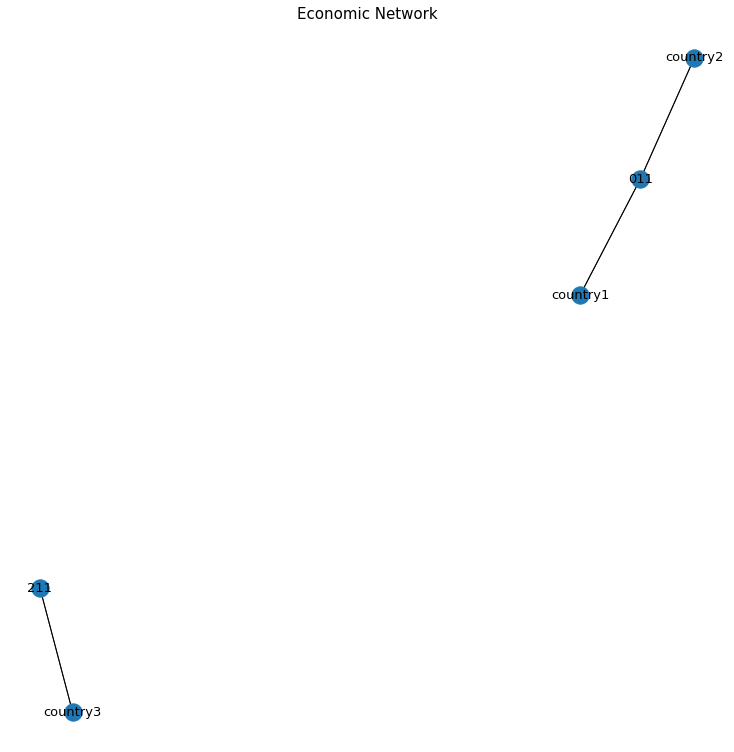

In [31]:
g=nx.from_pandas_edgelist(df,source = "sitc4",target ="exporter")
#nx.draw(g)

size_variable = 10
pos = nx.spring_layout(g)
degreecen=nx.degree_centrality(g)
values2 = [degreecen.get(node) for node in g.nodes()]
values2=list(map(lambda x: x*size_variable ,values2))

plt.close('all')
plt.figure(figsize=(10, 10))
nx.draw(g,pos, cmap = plt.get_cmap("rainbow"), node_color = "purple", node_size=values2,with_labels = False,alpha=0.8)
nx.draw_networkx(g,pos,font_size=13)
plt.title( "Economic Network", size=15)
plt.show()
plt.close()

# K series

In [36]:
idf = mcp

k = dict()
for product in idf.sitc4.unique():
    mdf = idf[idf.sitc4==product]
    k[product]=[len(mdf)]
    if len(mdf)==0:
        print(mdf)
for country in idf.exporter.unique():
    mdf = idf[idf.exporter==country]
    k[country]=[len(mdf)]
    

for country in idf.exporter.unique():
    mdf = idf[idf.exporter==country]
    sum_kp = 0
    for product in mdf.sitc4.unique():
        sum_kp += k[product][0]
    k[country].append(sum_kp/k[country][0])

for product in idf.sitc4.unique():
    mdf = idf[idf.sitc4==product]
    sum_kc = 0
    for country in mdf.exporter.unique():
        sum_kc += k[country][0]
    k[product].append(sum_kc/k[product][0])

for country in idf.exporter.unique():
    mdf = idf[idf.exporter==country]
    sum_kp = 0
    for product in mdf.sitc4.unique():
        sum_kp += k[product][1]
    k[country].append(sum_kp/k[country][0])

for product in idf.sitc4.unique():
    mdf = idf[idf.sitc4==product]
    sum_kc = 0
    for country in mdf.exporter.unique():
        sum_kc += k[country][1]
    k[product].append(sum_kc/k[product][0])
    
    
    
country_list = list(idf.exporter.unique())
country_list.remove("World")


kdf = pd.DataFrame({'country_name': country_list,
                    'kc0': list(map(lambda x: k[x][0],country_list)),
                   'kc1': list(map(lambda x: k[x][1],country_list))})

layout = dict(plot_bgcolor='white', xaxis=dict(title='$k_{c,0}$', linecolor='#d9d9d9', mirror=True),
              yaxis=dict(title='$k_{c,1}$', linecolor='#d9d9d9', mirror=True))

data = go.Scatter(x=kdf['kc0'],
                  y=kdf['kc1'],
                  text=kdf['country_name'],
                  mode='markers+text',
                  marker=dict(color='rgba(48, 217, 189, 1)'),
                  name='citations')

fig = go.Figure(data=data, layout=layout)

fig.show()

In [37]:
k["Mexico"]

[146, 17.027397260273972, 115.19806774550422]